# Pymaceuticals Inc.
---

### Analysis


1. Data Overview
The study analyzed data from 249 mice with squamous cell carcinoma (SCC) tumors who received treatment with various drug regimens over a 45-day period. The data were cleaned to remove duplicate records, resulting in a final dataset used for analysis.

2. Summary Statistics
Drug Regimens: Tumor volume statistics were computed for each drug regimen. The key statistics include mean, median, variance, standard deviation, and standard error of the mean (SEM) for tumor volumes.
Notable Regimens: The Capomulin regimen, in particular, showed consistently lower average tumor volumes compared to others, indicating potential effectiveness.
3. Bar Charts
Number of Mice Tested: Bar charts illustrate the total number of mice tested for each drug regimen. Both Pandas and Matplotlib charts show that the number of mice tested varies across regimens, providing insights into the study’s scope.
4. Pie Charts
Gender Distribution: Pie charts reveal the distribution of male versus female mice. The study included a relatively balanced number of male and female mice, ensuring diverse representation.
5. Box Plot Analysis
Final Tumor Volume: Box plots for the four primary drug regimens (Capomulin, Ramicane, Infubinol, Ceftamin) show the distribution of final tumor volumes. Capomulin and Ramicane exhibit fewer outliers and lower tumor volumes, suggesting better efficacy compared to Infubinol and Ceftamin.
6. Line Plot
Capomulin Treatment: A line plot of tumor volume versus time for a single mouse treated with Capomulin demonstrates a consistent reduction in tumor volume over time, reinforcing Capomulin’s potential effectiveness in tumor control.
7. Scatter Plot and Correlation
Mouse Weight vs. Tumor Volume: The scatter plot of mouse weight versus average tumor volume for the Capomulin regimen shows a positive correlation. The correlation coefficient is positive, indicating that heavier mice tend to have larger tumors.
Regression Analysis: The linear regression analysis reveals a positive relationship between mouse weight and tumor volume. The regression line suggests that increases in weight are associated with increases in tumor volume.
8. Key Observations
Effectiveness of Capomulin: Capomulin stands out as a highly effective treatment based on the lower final tumor volumes and the significant reduction in tumor size over time.
Comparison with Other Regimens: Other regimens like Ramicane also show effectiveness, but Infubinol and Ceftamin display higher tumor volumes and more variability, indicating less efficacy.
Correlation Insights: The positive correlation between mouse weight and tumor volume suggests that monitoring weight might be relevant for assessing tumor growth, though further investigation is needed to understand the underlying mechanisms.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)


# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_data = combined_data["Mouse ID"].unique()
number_of_mice = len(mice_data)
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicates["Mouse ID"].unique()
import numpy as np
formatted_output = np.array(duplicate_mouse_ids, dtype=object)
formatted_output


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_total_data=combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice = clean_total_data["Mouse ID"].unique()
number_of_unique_mice = len(unique_mice)
print(number_of_unique_mice)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen0
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

drug_reg_data = clean_total_data.set_index(["Drug Regimen"])
group_drug_data = drug_reg_data.groupby("Drug Regimen")
drug_reg_mean = group_drug_data["Tumor Volume (mm3)"].mean()
drug_reg_median = group_drug_data["Tumor Volume (mm3)"].median()
drug_reg_var = group_drug_data["Tumor Volume (mm3)"].var()
drug_reg_std = group_drug_data["Tumor Volume (mm3)"].std()
drug_reg_sem = group_drug_data["Tumor Volume (mm3)"].sem()

drug_reg_sum_df  = pd.DataFrame({"Mean Tumor Volume":  drug_reg_mean,
                                 "Median Tumor Volume":  drug_reg_median,
                                 "Tumor Volume Variance":  drug_reg_var,
                                 "Tumor Volume Std. Dev.":  drug_reg_std,
                                 "Tumor Volume Std. Err.":  drug_reg_sem})
drug_reg_sum_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_reg_sum_df = drug_reg_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_drug_reg_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

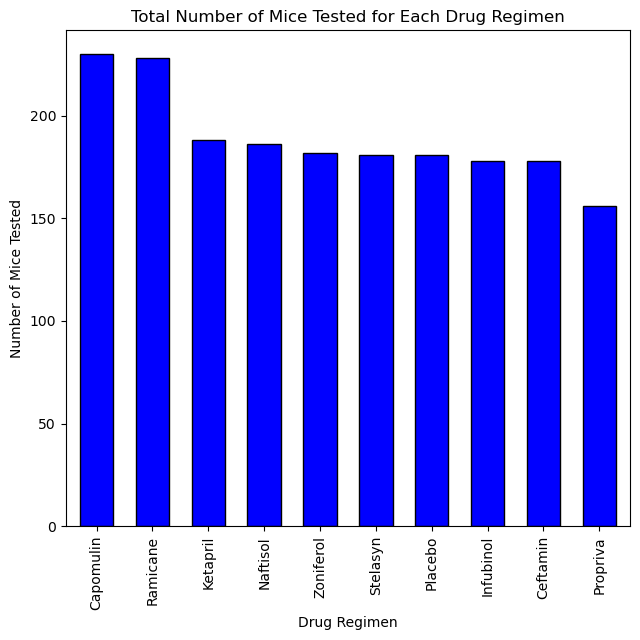

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen

# relevant columns
mice_and_drugs = clean_total_data[["Drug Regimen", "Timepoint"]]

# count per drug regimen
mice_per_drug = mice_and_drugs["Drug Regimen"].value_counts()
ax = mice_per_drug.plot(kind='bar', color='b', edgecolor='black', figsize=(6.5, 6.5), width=0.6)

# labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total Number of Mice Tested for Each Drug Regimen")
plt.xticks(rotation=90, ha='center')

plt.tight_layout()
plt.show()

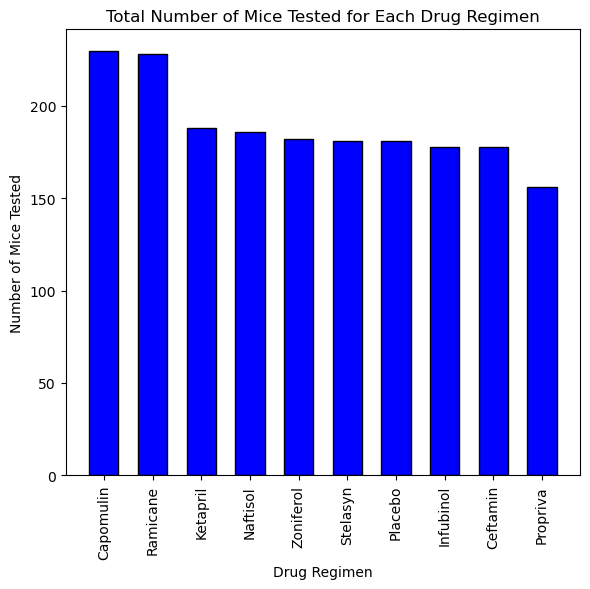

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_and_drugs = clean_total_data[["Drug Regimen", "Timepoint"]]
mice_per_drug = mice_and_drugs["Drug Regimen"].value_counts()

plt.figure(figsize=(6, 6))  # Set the figure size
plt.bar(mice_per_drug.index, mice_per_drug.values, color='blue', edgecolor='black', width=0.6)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total Number of Mice Tested for Each Drug Regimen")
plt.xticks(rotation=90, ha='center')

plt.tight_layout()
plt.show()

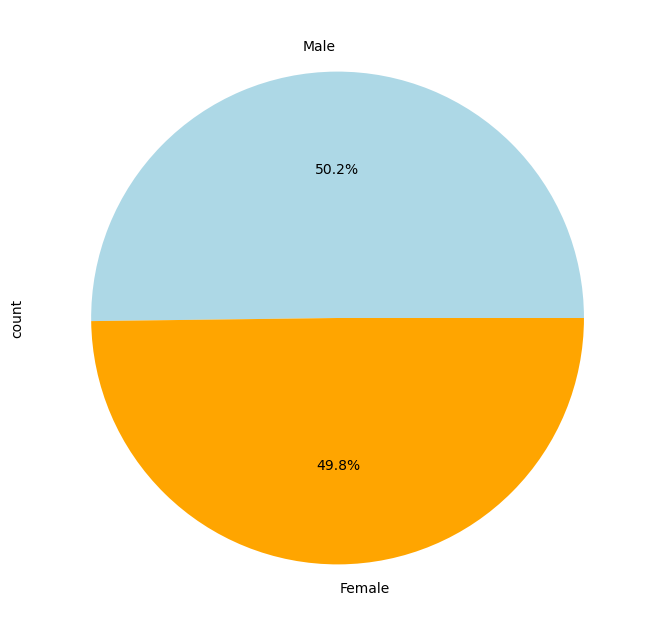

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

unique_mice = clean_total_data.drop_duplicates(subset=["Mouse ID"])
gender_distribution = unique_mice["Sex"].value_counts()

# Make the pie chart
ax = gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['lightblue', 'orange'])
plt.show()

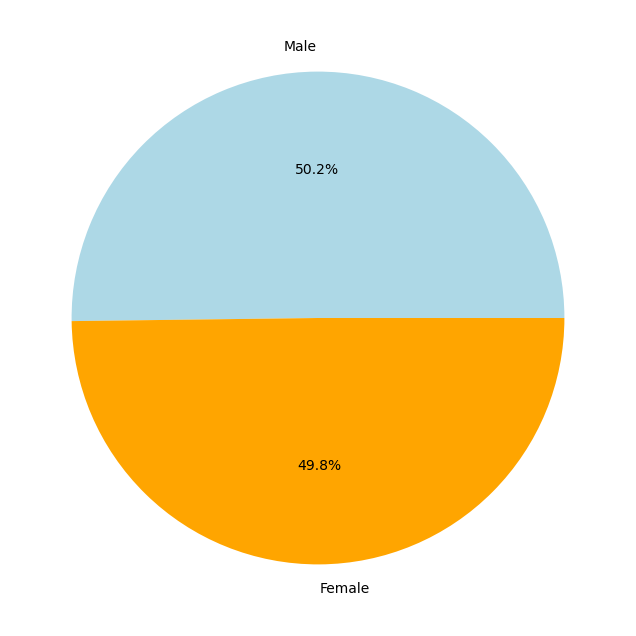

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = clean_total_data.drop_duplicates(subset=["Mouse ID"])
gender_distribution = unique_mice["Sex"].value_counts()



# Make the pie chart
plt.figure(figsize=(8, 8)) 
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=360)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
reduced_drug_data = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin") | (clean_total_data["Drug Regimen"] == "Ramicane") |
                                        (clean_total_data["Drug Regimen"] == "Infubinol") |(clean_total_data["Drug Regimen"] == "Ceftamin") ]



last_tp = reduced_drug_data.groupby(["Drug Regimen","Mouse ID"]).last()
new_last_tp = last_tp.reset_index()

reduced_last_tp=new_last_tp[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_last_tp

capomulin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ceftamin"]
ceftamin_df

new_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

new_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
# Determine outliers using upper and lower bounds


treatments = reduced_last_tp["Drug Regimen"].unique()


tum_vol_data = []
upperq_list = []
lowerq_list = []

for treatment in treatments:
 
    tumor_volumes = new_df[treatment]
    
  
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    
  
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    

    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
   
    tum_vol_data.append(tumor_volumes)
    
   
    print(f"{treatment} IQR: {iqr}")
    print(f"{treatment} Outliers: {outliers.tolist()}")


print("Upper Quartiles:", upperq_list)
print("Lower Quartiles:", lowerq_list)


Capomulin IQR: 7.781863460000004
Capomulin Outliers: []
Ceftamin IQR: 15.577752179999997
Ceftamin Outliers: []
Infubinol IQR: 11.477135160000003
Infubinol Outliers: [36.3213458]
Ramicane IQR: 9.098536719999998
Ramicane Outliers: []
Upper Quartiles: [40.1592203, 64.29983003, 65.52574285, 40.65900627]
Lower Quartiles: [32.37735684, 48.72207785, 54.04860769, 31.56046955]


Text(0.5, 0, '')

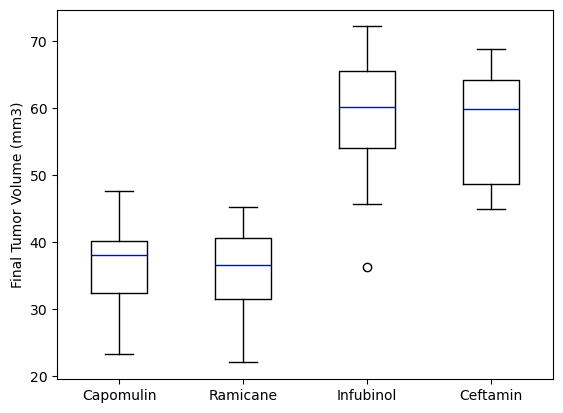

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
boxplot = new_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

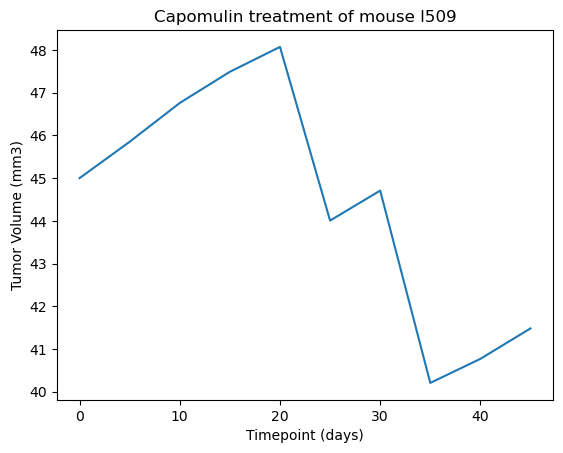

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#create dataframe with just Capolumin data
capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin") & (clean_total_data["Mouse ID"] == "l509") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

#get values ready for plotting
timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values

#graph build and display
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

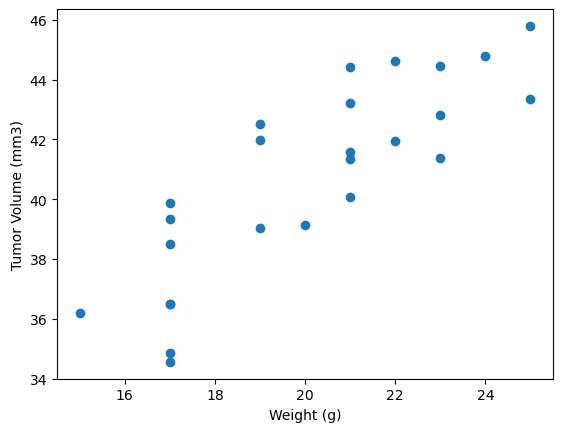

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})
#graph build and display
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


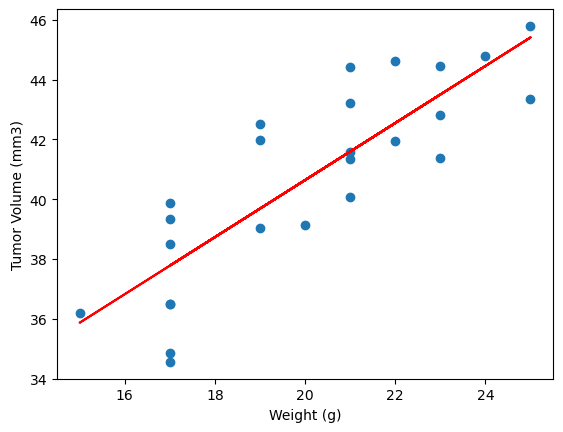

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=avg_capomulin_df["Weight (g)"]
y_values=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()